# Iris Flower dataset Analysis.

## Using Logistic Regression, SVM, KNN, Decision Tree from sklearn library.

<img src='https://i.pinimg.com/originals/75/af/2e/75af2e6e26bba5d61af7866f96e3761c.jpg'>

In [7]:
# Check Versions
import sys
import numpy
import pandas
import matplotlib
import seaborn
import sklearn

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Sklearn: {}'.format(sklearn.__version__))

Python: 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
Numpy: 1.16.2
Pandas: 0.24.1
Matplotlib: 3.0.3
Seaborn: 0.9.0
Sklearn: 0.20.3


In [8]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [9]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv(url, names=names)

# Peek at Data
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# Dimension of data
print(df.shape)

(150, 5)


In [11]:
# Statistical Summary
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
# Class distribution
df.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

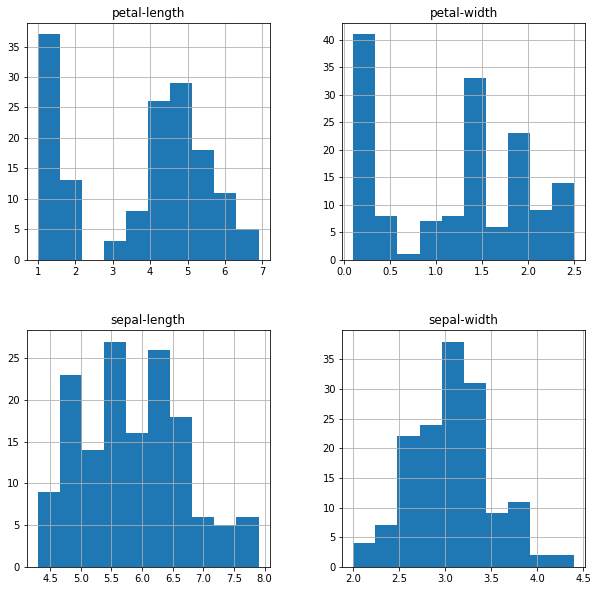

In [13]:
# Plot histograms for each variable
df.hist(figsize = (10, 10))
plt.show()

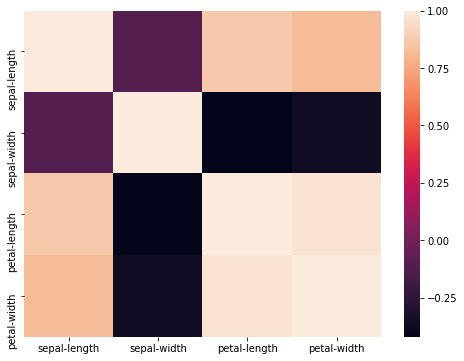

In [14]:
# Correlation graph
fig, ax = plt.subplots(figsize=(8, 6)) 
sns.heatmap(df.corr())
plt.show()

In [15]:
# Split the data into train and test
X = df.iloc[:, 0:4]
y = df.iloc[:, 4]
seed = 7
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =seed)

In [16]:
# We will use 10-fold cross validation to estimate accuracy.
# This will split our dataset into 10 parts, train on 9 and test on 1 and 
# repeat for all combinations of train-test splits.
from sklearn.model_selection import KFold, cross_val_score

# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [17]:
# Build and Evaluate models
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('CART', DecisionTreeClassifier()))

# Evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg= "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
KNN: 0.983333 (0.033333)
SVM: 0.991667 (0.025000)
CART: 0.983333 (0.033333)


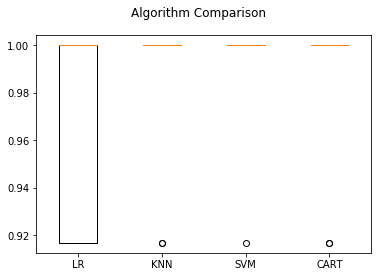

In [18]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

We can see that the box and whisker plots are squashed at the top of the range, with many samples achieving 100% accuracy.

In [19]:
# Prediction for test set using SVM
classifier = SVC(gamma='auto')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [20]:
# Summarizing the results
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

      micro avg       0.93      0.93      0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



In [21]:
# Accuracy of model prediction
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9333333333333333


### Conclusion: Accuracy of 93% suggests that this is good model.